In [159]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt
import seaborn as cns
    

In [160]:
# Isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL656
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T10:55:00.000
Actual Departure: 2017-12-22T16:51:00.000
Flight Departure Delayed by (H:M:S): 5:56:00
Departure Time Delta (minutes): 356.0


Flight Counter: 2
Airline Flight#: DL1188
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T11:37:00.000
Actual Departure: 2017-12-22T13:52:00.000
Flight Departure Delayed by (H:M:S): 2:15:00
Departure Time Delta (minutes): 135.0


Flight Counter: 3
Airline Flight#: DL1586
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:30:00.000
Actual Departure: 2017-12-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 4
Airline Flight#: DL1963
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T13:35:00.000
Actual Departure: 2017-12-22T14:04:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 5
Airline F

Flight Counter: 65
Airline Flight#: DL370
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T15:17:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 66
Airline Flight#: DL1250
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T14:59:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 67
Airline Flight#: DL2184
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T15:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 68
Airline Flight#: DL827
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T15:05:00.000
Actual Departure: 2017-12-22T15:02:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 69
Airline Flight#: DL2613
Airport: ATL

Flight Counter: 121
Airline Flight#: DL1964
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T16:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 122
Airline Flight#: DL1176
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T17:00:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 123
Airline Flight#: DL1886
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T16:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 124
Airline Flight#: DL109
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T16:30:00.000
Actual Departure: 2017-12-22T16:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 125
Airline Fl

Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 158
Airline Flight#: DL1115
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:28:00.000
Actual Departure: 2017-12-22T17:22:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 159
Airline Flight#: DL2784
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:30:00.000
Actual Departure: 2017-12-22T17:26:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 160
Airline Flight#: DL2322
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:30:00.000
Actual Departure: 2017-12-22T17:47:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 161
Airline Flight#: DL1685
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T17:31:00.000
Actual Departure: 2017-12-22T17:32:00.000
Flight Departure Delayed by

Flight Counter: 213
Airline Flight#: DL2652
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:30:00.000
Actual Departure: 2017-12-22T18:41:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 214
Airline Flight#: DL2394
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:31:00.000
Actual Departure: 2017-12-22T18:41:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 215
Airline Flight#: DL565
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:33:00.000
Actual Departure: 2017-12-22T18:34:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 216
Airline Flight#: DL2024
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T18:34:00.000
Actual Departure: 2017-12-22T18:33:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 217
Airli

Flight Counter: 264
Airline Flight#: DL752
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:40:00.000
Actual Departure: 2017-12-22T19:47:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 265
Airline Flight#: DL2100
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:40:00.000
Actual Departure: 2017-12-22T19:42:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 266
Airline Flight#: DL1173
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:45:00.000
Actual Departure: 2017-12-22T19:52:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 267
Airline Flight#: DL2331
Airport: ATL
Date: 2017-12-22
Scheduled Departure: 2017-12-22T19:45:00.000
Actual Departure: 2017-12-22T20:04:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 268
Airl

Flight Counter: 300
Airline Flight#: DL1820
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:53:00.000
Actual Departure: 2017-12-23T14:15:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 301
Airline Flight#: DL1862
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:55:00.000
Actual Departure: 2017-12-23T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 302
Airline Flight#: DL2586
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T13:55:00.000
Actual Departure: 2017-12-23T15:21:00.000
Flight Departure Delayed by (H:M:S): 1:26:00
Departure Time Delta (minutes): 86.0


Flight Counter: 303
Airline Flight#: DL385
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T14:00:00.000
Actual Departure: 2017-12-23T14:03:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 304
Ai

Flight Counter: 350
Airline Flight#: DL2613
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:06:00.000
Actual Departure: 2017-12-23T15:40:00.000
Flight Departure Delayed by (H:M:S): 0:34:00
Departure Time Delta (minutes): 34.0


Flight Counter: 351
Airline Flight#: DL2567
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:06:00.000
Actual Departure: 2017-12-23T15:05:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 352
Airline Flight#: DL2176
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:08:00.000
Actual Departure: 2017-12-23T15:26:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 353
Airline Flight#: DL1381
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T15:10:00.000
Actual Departure: 2017-12-23T15:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 354
Airlin

Flight Counter: 397
Airline Flight#: DL2774
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:28:00.000
Actual Departure: 2017-12-23T16:23:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 398
Airline Flight#: DL1176
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:30:00.000
Actual Departure: 2017-12-23T17:05:00.000
Flight Departure Delayed by (H:M:S): 0:35:00
Departure Time Delta (minutes): 35.0


Flight Counter: 399
Airline Flight#: DL1964
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:30:00.000
Actual Departure: 2017-12-23T16:39:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 400
Airline Flight#: DL109
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T16:30:00.000
Actual Departure: 2017-12-23T17:14:00.000
Flight Departure Delayed by (H:M:S): 0:44:00
Departure Time Delta (minutes): 44.0


Flight Counter: 401
Airli

Flight Counter: 444
Airline Flight#: DL1774
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:48:00.000
Actual Departure: 2017-12-23T18:30:00.000
Flight Departure Delayed by (H:M:S): 0:42:00
Departure Time Delta (minutes): 42.0


Flight Counter: 445
Airline Flight#: DL2266
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:49:00.000
Actual Departure: 2017-12-23T18:07:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 446
Airline Flight#: DL14
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:50:00.000
Actual Departure: 2017-12-23T17:49:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 447
Airline Flight#: DL2553
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T17:50:00.000
Actual Departure: 2017-12-23T17:49:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 448
Airline 

Scheduled Departure: 2017-12-23T18:45:00.000
Actual Departure: 2017-12-23T18:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 491
Airline Flight#: DL1748
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:45:00.000
Actual Departure: 2017-12-23T18:46:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 492
Airline Flight#: DL2150
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:55:00.000
Actual Departure: 2017-12-23T19:36:00.000
Flight Departure Delayed by (H:M:S): 0:41:00
Departure Time Delta (minutes): 41.0


Flight Counter: 493
Airline Flight#: DL313
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T18:56:00.000
Actual Departure: 2017-12-23T19:36:00.000
Flight Departure Delayed by (H:M:S): 0:40:00
Departure Time Delta (minutes): 40.0


Flight Counter: 494
Airline Flight#: DL632
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-

Flight Counter: 535
Airline Flight#: DL1541
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:50:00.000
Actual Departure: 2017-12-23T21:23:00.000
Flight Departure Delayed by (H:M:S): 1:33:00
Departure Time Delta (minutes): 93.0


Flight Counter: 536
Airline Flight#: DL2495
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:50:00.000
Actual Departure: 2017-12-23T19:54:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 537
Airline Flight#: DL1482
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:51:00.000
Actual Departure: 2017-12-23T19:50:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 538
Airline Flight#: DL2459
Airport: ATL
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:51:00.000
Actual Departure: 2017-12-23T20:03:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 539
Airl

Flight Counter: 579
Airline Flight#: DL2311
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:52:00.000
Actual Departure: 2017-12-24T14:57:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 580
Airline Flight#: DL1416
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:53:00.000
Actual Departure: 2017-12-24T14:49:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 581
Airline Flight#: DL1998
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:55:00.000
Actual Departure: 2017-12-24T14:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 582
Airline Flight#: DL1983
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T14:55:00.000
Actual Departure: 2017-12-24T14:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 583
Airline Flight#: DL2172
Airpor

Flight Counter: 624
Airline Flight#: DL1424
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:20:00.000
Actual Departure: 2017-12-24T15:55:00.000
Flight Departed Early by (H:M:S): 0:25:00
Departure Time Delta (minutes): -25.0


Flight Counter: 625
Airline Flight#: DL1810
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:21:00.000
Actual Departure: 2017-12-24T16:20:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 626
Airline Flight#: DL1663
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:24:00.000
Actual Departure: 2017-12-24T16:20:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 627
Airline Flight#: DL2081
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T16:25:00.000
Actual Departure: 2017-12-24T16:24:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 628
Airline Fli

Flight Counter: 668
Airline Flight#: DL2266
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:49:00.000
Actual Departure: 2017-12-24T17:58:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 669
Airline Flight#: DL14
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:50:00.000
Actual Departure: 2017-12-24T17:43:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 670
Airline Flight#: DL393
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:50:00.000
Actual Departure: 2017-12-24T17:54:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 671
Airline Flight#: DL1236
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T17:53:00.000
Actual Departure: 2017-12-24T17:59:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 672
Airline F

Scheduled Departure: 2017-12-24T19:10:00.000
Actual Departure: 2017-12-24T19:20:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 713
Airline Flight#: DL2024
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:10:00.000
Actual Departure: 2017-12-24T19:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 714
Airline Flight#: DL1947
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:11:00.000
Actual Departure: 2017-12-24T19:09:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 715
Airline Flight#: DL792
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-12-24T19:12:00.000
Actual Departure: 2017-12-24T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 716
Airline Flight#: DL2534
Airport: ATL
Date: 2017-12-24
Scheduled Departure: 2017-1

Flight Counter: 767
Airline Flight#: DL902
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T14:58:00.000
Actual Departure: 2017-12-25T14:54:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 768
Airline Flight#: DL810
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T14:59:00.000
Actual Departure: 2017-12-25T14:55:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 769
Airline Flight#: DL1524
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T14:59:00.000
Actual Departure: 2017-12-25T14:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 770
Airline Flight#: DL980
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T15:00:00.000
Actual Departure: 2017-12-25T14:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 771
Airline Flight#

Flight Counter: 832
Airline Flight#: DL1919
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:17:00.000
Actual Departure: 2017-12-25T17:15:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 833
Airline Flight#: DL1293
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:20:00.000
Actual Departure: 2017-12-25T17:18:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 834
Airline Flight#: DL1115
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:28:00.000
Actual Departure: 2017-12-25T20:23:00.000
Flight Departure Delayed by (H:M:S): 2:55:00
Departure Time Delta (minutes): 175.0


Flight Counter: 835
Airline Flight#: DL2281
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T17:30:00.000
Actual Departure: 2017-12-25T18:07:00.000
Flight Departure Delayed by (H:M:S): 0:37:00
Departure Time Delta (minutes): 37.0


Flight Counter: 836
Airli



Flight Counter: 879
Airline Flight#: DL65
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:00:00.000
Actual Departure: 2017-12-25T19:14:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 880
Airline Flight#: DL1171
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:00:00.000
Actual Departure: 2017-12-25T19:03:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 881
Airline Flight#: DL2293
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:00:00.000
Actual Departure: 2017-12-25T19:11:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 882
Airline Flight#: DL2331
Airport: ATL
Date: 2017-12-25
Scheduled Departure: 2017-12-25T19:00:00.000
Actual Departure: 2017-12-25T19:38:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 883
A

Flight Counter: 924
Airline Flight#: DL295
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T11:07:00.000
Actual Departure: 2018-01-22T19:04:00.000
Flight Departure Delayed by (H:M:S): 7:57:00
Departure Time Delta (minutes): 477.0


Flight Counter: 925
Airline Flight#: DL1661
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:25:00.000
Actual Departure: 2018-01-22T13:54:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 926
Airline Flight#: DL2297
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 927
Airline Flight#: DL2472
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 928
Airline Flight#: DL2046

Airline Flight#: DL1168
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:55:00.000
Actual Departure: 2018-01-22T14:50:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 977
Airline Flight#: DL2109
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:55:00.000
Actual Departure: 2018-01-22T14:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 978
Airline Flight#: DL1416
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:55:00.000
Actual Departure: 2018-01-22T14:51:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 979
Airline Flight#: DL2184
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:56:00.000
Actual Departure: 2018-01-22T14:53:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 980
Airline Flight#: DL2256
Airport:

Flight Counter: 1012
Airline Flight#: DL885
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:17:00.000
Actual Departure: 2018-01-22T15:16:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1013
Airline Flight#: DL1983
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:17:00.000
Actual Departure: 2018-01-22T15:24:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 1014
Airline Flight#: DL1922
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:18:00.000
Actual Departure: 2018-01-22T15:54:00.000
Flight Departure Delayed by (H:M:S): 0:36:00
Departure Time Delta (minutes): 36.0


Flight Counter: 1015
Airline Flight#: DL2599
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:20:00.000
Actual Departure: 2018-01-22T15:32:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1016


Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:57:00.000
Actual Departure: 2018-01-22T16:54:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1089
Airline Flight#: DL2176
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:58:00.000
Actual Departure: 2018-01-22T17:02:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1090
Airline Flight#: DL2550
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:58:00.000
Actual Departure: 2018-01-22T16:55:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1091
Airline Flight#: DL802
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:59:00.000
Actual Departure: 2018-01-22T17:09:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 1092
Airline Flight#: DL2334
Airport: ATL
Date: 2018-01-22
Schedul

Flight Counter: 1163
Airline Flight#: DL2150
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T18:55:00.000
Actual Departure: 2018-01-22T18:53:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1164
Airline Flight#: DL2502
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1165
Airline Flight#: DL951
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:57:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1166
Airline Flight#: DL2327
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T19:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1167
Airline Flight#: DL1628
Airp

Flight Counter: 1204
Airline Flight#: DL504
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:38:00.000
Actual Departure: 2018-01-22T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1205
Airline Flight#: DL1576
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:40:00.000
Actual Departure: 2018-01-22T20:10:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 1206
Airline Flight#: DL675
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:40:00.000
Actual Departure: 2018-01-22T19:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1207
Airline Flight#: DL2078
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:41:00.000
Actual Departure: 2018-01-22T19:55:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1208
A

Departure Time Delta (minutes): 0


Flight Counter: 1267
Airline Flight#: DL1754
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:20:00.000
Actual Departure: 2018-01-23T14:18:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1268
Airline Flight#: DL1116
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:21:00.000
Actual Departure: 2018-01-23T14:16:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1269
Airline Flight#: DL780
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:24:00.000
Actual Departure: 2018-01-23T14:23:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1270
Airline Flight#: DL1695
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:25:00.000
Actual Departure: 2018-01-23T14:19:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): 

Flight Counter: 1306
Airline Flight#: DL1341
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:06:00.000
Actual Departure: 2018-01-23T14:59:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1307
Airline Flight#: DL320
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:10:00.000
Actual Departure: 2018-01-23T15:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1308
Airline Flight#: DL2053
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:10:00.000
Actual Departure: 2018-01-23T15:05:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1309
Airline Flight#: DL2006
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:10:00.000
Actual Departure: 2018-01-23T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1310
Airline 

Flight Counter: 1350
Airline Flight#: DL2337
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:20:00.000
Actual Departure: 2018-01-23T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1351
Airline Flight#: DL2483
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:20:00.000
Actual Departure: 2018-01-23T16:15:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1352
Airline Flight#: DL1199
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:20:00.000
Actual Departure: 2018-01-23T16:19:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1353
Airline Flight#: DL1133
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:20:00.000
Actual Departure: 2018-01-23T16:22:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1354
Airli

Flight Counter: 1393
Airline Flight#: DL795
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:06:00.000
Actual Departure: 2018-01-23T18:26:00.000
Flight Departure Delayed by (H:M:S): 1:20:00
Departure Time Delta (minutes): 80.0


Flight Counter: 1394
Airline Flight#: DL826
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:09:00.000
Actual Departure: 2018-01-23T17:04:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1395
Airline Flight#: DL1053
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:14:00.000
Actual Departure: 2018-01-23T17:13:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1396
Airline Flight#: DL982
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:15:00.000
Actual Departure: 2018-01-23T17:13:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1397
Airline

Flight Counter: 1441
Airline Flight#: DL369
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:10:00.000
Actual Departure: 2018-01-23T18:07:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1442
Airline Flight#: DL2826
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:12:00.000
Actual Departure: 2018-01-23T18:25:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 1443
Airline Flight#: DL200
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:14:00.000
Actual Departure: 2018-01-23T18:41:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 1444
Airline Flight#: DL319
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:16:00.000
Actual Departure: 2018-01-23T18:09:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1445
Airl

Actual Departure: 2018-01-23T19:32:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1489
Airline Flight#: DL2186
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:30:00.000
Actual Departure: 2018-01-23T20:29:00.000
Flight Departure Delayed by (H:M:S): 0:59:00
Departure Time Delta (minutes): 59.0


Flight Counter: 1490
Airline Flight#: DL1926
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:30:00.000
Actual Departure: 2018-01-23T19:23:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1491
Airline Flight#: DL2348
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:31:00.000
Actual Departure: 2018-01-23T19:27:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1492
Airline Flight#: DL1356
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:33:00.000
Actual Departure: 2018-

Flight Counter: 1544
Airline Flight#: DL991
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:01:00.000
Actual Departure: 2018-01-24T14:00:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1545
Airline Flight#: DL2133
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:02:00.000
Actual Departure: 2018-01-24T13:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1546
Airline Flight#: DL2034
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:05:00.000
Actual Departure: 2018-01-24T13:58:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1547
Airline Flight#: DL2084
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:10:00.000
Actual Departure: 2018-01-24T14:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1548
Airline 

Flight Counter: 1593
Airline Flight#: DL1341
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:06:00.000
Actual Departure: 2018-01-24T15:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1594
Airline Flight#: DL320
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:10:00.000
Actual Departure: 2018-01-24T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1595
Airline Flight#: DL1998
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:10:00.000
Actual Departure: 2018-01-24T15:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1596
Airline Flight#: DL2006
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:10:00.000
Actual Departure: 2018-01-24T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1597
Airline Flight#: DL2053
Airp

Flight Counter: 1632
Airline Flight#: DL2396
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:00:00.000
Actual Departure: 2018-01-24T16:04:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1633
Airline Flight#: DL2630
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:00:00.000
Actual Departure: 2018-01-24T16:01:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1634
Airline Flight#: DL2737
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:05:00.000
Actual Departure: 2018-01-24T16:01:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1635
Airline Flight#: DL1378
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:08:00.000
Actual Departure: 2018-01-24T16:03:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1636
Air

Flight Counter: 1683
Airline Flight#: DL875
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:06:00.000
Actual Departure: 2018-01-24T17:18:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1684
Airline Flight#: DL795
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:06:00.000
Actual Departure: 2018-01-24T17:00:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1685
Airline Flight#: DL826
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:14:00.000
Actual Departure: 2018-01-24T17:11:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1686
Airline Flight#: DL1053
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:14:00.000
Actual Departure: 2018-01-24T17:16:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1687
Airli

Flight Counter: 1733
Airline Flight#: DL2826
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:12:00.000
Actual Departure: 2018-01-24T18:08:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1734
Airline Flight#: DL200
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:14:00.000
Actual Departure: 2018-01-24T18:13:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1735
Airline Flight#: DL319
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:16:00.000
Actual Departure: 2018-01-24T18:06:00.000
Flight Departed Early by (H:M:S): 0:10:00
Departure Time Delta (minutes): -10.0


Flight Counter: 1736
Airline Flight#: DL2024
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T18:21:00.000
Actual Departure: 2018-01-24T18:18:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1737
Airline 

Flight Counter: 1781
Airline Flight#: DL2417
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:25:00.000
Actual Departure: 2018-01-24T19:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1782
Airline Flight#: DL874
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:27:00.000
Actual Departure: 2018-01-24T19:25:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1783
Airline Flight#: DL2202
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:29:00.000
Actual Departure: 2018-01-24T19:27:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1784
Airline Flight#: DL1926
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:30:00.000
Actual Departure: 2018-01-24T19:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1785
Airline 

Flight Counter: 1824
Airline Flight#: DL420
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:50:00.000
Actual Departure: 2018-01-25T13:50:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1825
Airline Flight#: DL2224
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:51:00.000
Actual Departure: 2018-01-25T13:59:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 1826
Airline Flight#: DL1265
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T13:47:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1827
Airline Flight#: DL1690
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T13:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1828
Airline Flight#: DL1513
Ai

Flight Counter: 1869
Airline Flight#: DL1416
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:55:00.000
Actual Departure: 2018-01-25T14:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1870
Airline Flight#: DL1136
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:56:00.000
Actual Departure: 2018-01-25T14:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1871
Airline Flight#: DL2256
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:56:00.000
Actual Departure: 2018-01-25T15:06:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 1872
Airline Flight#: DL2184
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:56:00.000
Actual Departure: 2018-01-25T14:57:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1873
Ai

Scheduled Departure: 2018-01-25T16:00:00.000
Actual Departure: 2018-01-25T16:43:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta (minutes): 43.0


Flight Counter: 1933
Airline Flight#: DL2630
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:00:00.000
Actual Departure: 2018-01-25T15:57:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1934
Airline Flight#: DL2737
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:05:00.000
Actual Departure: 2018-01-25T16:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1935
Airline Flight#: DL1378
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:08:00.000
Actual Departure: 2018-01-25T16:04:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1936
Airline Flight#: DL1176
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018

Flight Counter: 1984
Airline Flight#: DL706
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:02:00.000
Actual Departure: 2018-01-25T17:01:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1985
Airline Flight#: DL1380
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:03:00.000
Actual Departure: 2018-01-25T16:58:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1986
Airline Flight#: DL1971
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:05:00.000
Actual Departure: 2018-01-25T17:02:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1987
Airline Flight#: DL795
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:06:00.000
Actual Departure: 2018-01-25T17:01:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1988
Airline F

Flight Counter: 2033
Airline Flight#: DL1878
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:08:00.000
Actual Departure: 2018-01-25T18:19:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 2034
Airline Flight#: DL784
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:09:00.000
Actual Departure: 2018-01-25T17:59:00.000
Flight Departed Early by (H:M:S): 0:10:00
Departure Time Delta (minutes): -10.0


Flight Counter: 2035
Airline Flight#: DL369
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:10:00.000
Actual Departure: 2018-01-25T18:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2036
Airline Flight#: DL2826
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:12:00.000
Actual Departure: 2018-01-25T18:52:00.000
Flight Departure Delayed by (H:M:S): 0:40:00
Departure Time Delta (minutes): 40.0


Flight Counter: 2037
Ai

Flight Counter: 2084
Airline Flight#: DL284
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:20:00.000
Actual Departure: 2018-01-25T19:20:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2085
Airline Flight#: DL2523
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:21:00.000
Actual Departure: 2018-01-25T19:12:00.000
Flight Departed Early by (H:M:S): 0:09:00
Departure Time Delta (minutes): -9.0


Flight Counter: 2086
Airline Flight#: DL1856
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:23:00.000
Actual Departure: 2018-01-25T19:22:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 2087
Airline Flight#: DL830
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:25:00.000
Actual Departure: 2018-01-25T19:45:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 2088
Airline Flight#: DL2417
Ai

Flight Counter: 2129
Airline Flight#: DL701
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T20:02:00.000
Actual Departure: 2018-01-25T19:57:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0




In [161]:
# Summarize Date Range A Full Period Atlanta
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")



Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()


ListATLA = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLA))




Departure Summary for Date Range A

Total Departures Early: 1195
Total Departures On Time: 191
Total Departures Delayed: 743
Total Departures: 2129

3


In [162]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,2129.000000
mean,6.604979
std,30.032695
min,-25.000000
25%,-3.000000
50%,-1.000000
75%,5.000000
max,759.000000


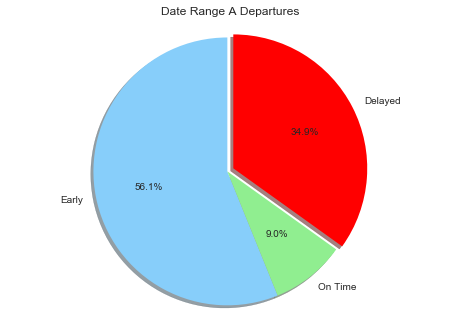

In [163]:
# Plot Date Range A Departures

Date_Range_A_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_A_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range A Departures")
plt.pie(Date_Range_A_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_A_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [164]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B

In [165]:
# Date Range A - Final ATL 
Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_A_Dates = ['20180122', '20180123', '20180124','20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"


for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
            
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]



Flight Counter: 1
Airline Flight#: DL295
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T11:07:00.000
Actual Departure: 2018-01-22T19:04:00.000
Flight Departure Delayed by (H:M:S): 7:57:00
Departure Time Delta (minutes): 477.0


Flight Counter: 2
Airline Flight#: DL1661
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:25:00.000
Actual Departure: 2018-01-22T13:54:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 3
Airline Flight#: DL2297
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 4
Airline Flight#: DL2472
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 5
Airline Flight#: DL2046
Airport: 

Flight Counter: 62
Airline Flight#: DL1083
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:00:00.000
Actual Departure: 2018-01-22T14:56:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 63
Airline Flight#: DL892
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:00:00.000
Actual Departure: 2018-01-22T14:56:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 64
Airline Flight#: DL1615
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:00:00.000
Actual Departure: 2018-01-22T15:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 65
Airline Flight#: DL902
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:01:00.000
Actual Departure: 2018-01-22T14:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 66
Airline Flight#: DL1341
Airport: ATL
Da

Flight Counter: 100
Airline Flight#: DL2111
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:30:00.000
Actual Departure: 2018-01-22T15:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 101
Airline Flight#: DL1792
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:32:00.000
Actual Departure: 2018-01-22T15:33:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 102
Airline Flight#: DL2398
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:34:00.000
Actual Departure: 2018-01-22T15:48:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 103
Airline Flight#: DL1689
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:35:00.000
Actual Departure: 2018-01-22T15:32:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 104
Airline

Flight Counter: 161
Airline Flight#: DL383
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:55:00.000
Actual Departure: 2018-01-22T17:26:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 162
Airline Flight#: DL29
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:55:00.000
Actual Departure: 2018-01-22T17:17:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 163
Airline Flight#: DL887
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:56:00.000
Actual Departure: 2018-01-22T16:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 164
Airline Flight#: DL359
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:57:00.000
Actual Departure: 2018-01-22T16:52:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 165
Airline Fli

Flight Counter: 210
Airline Flight#: DL337
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:56:00.000
Actual Departure: 2018-01-22T17:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 211
Airline Flight#: DL2291
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:56:00.000
Actual Departure: 2018-01-22T17:59:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 212
Airline Flight#: DL325
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:57:00.000
Actual Departure: 2018-01-22T17:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 213
Airline Flight#: DL313
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:58:00.000
Actual Departure: 2018-01-22T18:02:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 214
Airline Fli

Flight Counter: 254
Airline Flight#: DL821
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:09:00.000
Actual Departure: 2018-01-22T19:03:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 255
Airline Flight#: DL2015
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:09:00.000
Actual Departure: 2018-01-22T19:06:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 256
Airline Flight#: DL1285
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:10:00.000
Actual Departure: 2018-01-22T19:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 257
Airline Flight#: DL1124
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:11:00.000
Actual Departure: 2018-01-22T19:10:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 258
Airline Fligh

Flight Counter: 293
Airline Flight#: DL1331
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:51:00.000
Actual Departure: 2018-01-22T20:07:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 294
Airline Flight#: DL1289
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:51:00.000
Actual Departure: 2018-01-22T19:52:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 295
Airline Flight#: DL2827
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:52:00.000
Actual Departure: 2018-01-22T20:01:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 296
Airline Flight#: DL1515
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:54:00.000
Actual Departure: 2018-01-22T19:50:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 297
Airli

Flight Counter: 333
Airline Flight#: DL1862
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:53:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 334
Airline Flight#: DL1820
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T14:00:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 335
Airline Flight#: DL1634
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:56:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 336
Airline Flight#: DL991
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:01:00.000
Actual Departure: 2018-01-23T14:32:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 337
Airline Flight#: DL2133
Airpor

Flight Counter: 399
Airline Flight#: DL82
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:29:00.000
Actual Departure: 2018-01-23T15:24:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 400
Airline Flight#: DL2642
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:29:00.000
Actual Departure: 2018-01-23T15:27:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 401
Airline Flight#: DL2439
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:29:00.000
Actual Departure: 2018-01-23T15:26:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 402
Airline Flight#: DL2568
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:30:00.000
Actual Departure: 2018-01-23T16:55:00.000
Flight Departure Delayed by (H:M:S): 1:25:00
Departure Time Delta (minutes): 85.0


Flight Counter: 403
Airline Fli

Flight Counter: 451
Airline Flight#: DL2445
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:42:00.000
Actual Departure: 2018-01-23T16:41:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 452
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:44:00.000
Actual Departure: 2018-01-23T16:40:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 453
Airline Flight#: DL1800
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:45:00.000
Actual Departure: 2018-01-23T16:41:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 454
Airline Flight#: DL1623
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:45:00.000
Actual Departure: 2018-01-23T16:44:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 455
Airline Flig

Flight Counter: 498
Airline Flight#: DL14
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:50:00.000
Actual Departure: 2018-01-23T17:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 499
Airline Flight#: DL909
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:52:00.000
Actual Departure: 2018-01-23T17:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 500
Airline Flight#: DL2067
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:53:00.000
Actual Departure: 2018-01-23T17:46:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 501
Airline Flight#: DL1445
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:53:00.000
Actual Departure: 2018-01-23T17:50:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 502
Airline Flight#

Flight Counter: 548
Airline Flight#: DL1124
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:11:00.000
Actual Departure: 2018-01-23T19:06:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 549
Airline Flight#: DL2052
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:11:00.000
Actual Departure: 2018-01-23T19:08:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 550
Airline Flight#: DL1413
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:15:00.000
Actual Departure: 2018-01-23T19:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 551
Airline Flight#: DL2406
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:15:00.000
Actual Departure: 2018-01-23T19:13:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 552
Airline Flig

Flight Counter: 596
Airline Flight#: DL1213
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T20:01:00.000
Actual Departure: 2018-01-23T20:00:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 597
Airline Flight#: DL1322
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T20:02:00.000
Actual Departure: 2018-01-23T19:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 598
Airline Flight#: DL2322
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:40:00.000
Actual Departure: 2018-01-24T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 599
Airline Flight#: DL1963
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:45:00.000
Actual Departure: 2018-01-24T13:59:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 600
Airlin

Flight Counter: 645
Airline Flight#: DL370
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:55:00.000
Actual Departure: 2018-01-24T14:56:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 646
Airline Flight#: DL1416
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:55:00.000
Actual Departure: 2018-01-24T15:03:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 647
Airline Flight#: DL2109
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:55:00.000
Actual Departure: 2018-01-24T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 648
Airline Flight#: DL2184
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:56:00.000
Actual Departure: 2018-01-24T14:53:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 649
Airlin

Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:25:00.000
Actual Departure: 2018-01-24T15:21:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 687
Airline Flight#: DL2255
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:27:00.000
Actual Departure: 2018-01-24T15:27:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 688
Airline Flight#: DL2642
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:29:00.000
Actual Departure: 2018-01-24T15:23:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 689
Airline Flight#: DL2439
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:29:00.000
Actual Departure: 2018-01-24T15:21:00.000
Flight Departed Early by (H:M:S): 0:08:00
Departure Time Delta (minutes): -8.0


Flight Counter: 690
Airline Flight#: DL82
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 201

Departure Time Delta (minutes): -6.0


Flight Counter: 742
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:44:00.000
Actual Departure: 2018-01-24T16:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 743
Airline Flight#: DL1623
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:39:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 744
Airline Flight#: DL1800
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 745
Airline Flight#: DL1777
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:47:00.000
Actual Departure: 2018-01-24T16:44:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): 

Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:56:00.000
Actual Departure: 2018-01-24T17:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 798
Airline Flight#: DL2291
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:56:00.000
Actual Departure: 2018-01-24T17:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 799
Airline Flight#: DL325
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:57:00.000
Actual Departure: 2018-01-24T18:01:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 800
Airline Flight#: DL313
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:58:00.000
Actual Departure: 2018-01-24T18:01:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 801
Airline Flight#: DL1218
Airport: ATL
Date: 2018-01-24


Departure Time Delta (minutes): -6.0


Flight Counter: 853
Airline Flight#: DL1417
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:20:00.000
Actual Departure: 2018-01-24T19:20:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 854
Airline Flight#: DL2523
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:21:00.000
Actual Departure: 2018-01-24T20:08:00.000
Flight Departure Delayed by (H:M:S): 0:47:00
Departure Time Delta (minutes): 47.0


Flight Counter: 855
Airline Flight#: DL1856
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:23:00.000
Actual Departure: 2018-01-24T19:27:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 856
Airline Flight#: DL316
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:25:00.000
Actual Departure: 2018-01-24T19:23:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Co

Flight Counter: 895
Airline Flight#: DL897
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T12:55:00.000
Actual Departure: 2018-01-25T13:57:00.000
Flight Departure Delayed by (H:M:S): 1:02:00
Departure Time Delta (minutes): 62.0


Flight Counter: 896
Airline Flight#: DL2427
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:40:00.000
Actual Departure: 2018-01-25T13:57:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 897
Airline Flight#: DL2046
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:45:00.000
Actual Departure: 2018-01-25T13:44:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 898
Airline Flight#: DL2681
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:45:00.000
Actual Departure: 2018-01-25T13:45:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 899
Airline Flight#: DL1755
Air

Flight Counter: 932
Airline Flight#: DL780
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:24:00.000
Actual Departure: 2018-01-25T14:24:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 933
Airline Flight#: DL1695
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:25:00.000
Actual Departure: 2018-01-25T14:21:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 934
Airline Flight#: DL2416
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:25:00.000
Actual Departure: 2018-01-25T14:21:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 935
Airline Flight#: DL1534
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:29:00.000
Actual Departure: 2018-01-25T14:28:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 936
Airline Flight#: DL2047
Airport: 

Flight Counter: 977
Airline Flight#: DL729
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:12:00.000
Actual Departure: 2018-01-25T15:06:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 978
Airline Flight#: DL980
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:15:00.000
Actual Departure: 2018-01-25T15:16:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 979
Airline Flight#: DL2469
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:15:00.000
Actual Departure: 2018-01-25T15:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 980
Airline Flight#: DL2365
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:16:00.000
Actual Departure: 2018-01-25T15:13:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 981
Airline Flig

Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:20:00.000
Actual Departure: 2018-01-25T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1020
Airline Flight#: DL1813
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:20:00.000
Actual Departure: 2018-01-25T16:15:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1021
Airline Flight#: DL2483
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:20:00.000
Actual Departure: 2018-01-25T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1022
Airline Flight#: DL2187
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:21:00.000
Actual Departure: 2018-01-25T16:20:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1023
Airline Flight#: DL762
Airport: ATL
Date: 2018-01-25

Flight Counter: 1074
Airline Flight#: DL1247
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:27:00.000
Actual Departure: 2018-01-25T17:23:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1075
Airline Flight#: DL1825
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:28:00.000
Actual Departure: 2018-01-25T17:24:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1076
Airline Flight#: DL1198
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:29:00.000
Actual Departure: 2018-01-25T17:24:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1077
Airline Flight#: DL2784
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:30:00.000
Actual Departure: 2018-01-25T17:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1078
Airline

Flight Counter: 1117
Airline Flight#: DL2024
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:21:00.000
Actual Departure: 2018-01-25T18:20:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1118
Airline Flight#: DL1821
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:26:00.000
Actual Departure: 2018-01-25T18:19:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 1119
Airline Flight#: DL549
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:26:00.000
Actual Departure: 2018-01-25T18:32:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1120
Airline Flight#: DL1817
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:29:00.000
Actual Departure: 2018-01-25T18:26:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1121
Airlin

Flight Counter: 1152
Airline Flight#: DL2406
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:15:00.000
Actual Departure: 2018-01-25T19:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1153
Airline Flight#: DL1413
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:15:00.000
Actual Departure: 2018-01-25T19:10:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1154
Airline Flight#: DL2408
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:18:00.000
Actual Departure: 2018-01-25T19:22:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1155
Airline Flight#: DL2366
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:18:00.000
Actual Departure: 2018-01-25T19:14:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1156
Airli

Flight Counter: 1198
Airline Flight#: DL2509
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:58:00.000
Actual Departure: 2018-01-25T19:58:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1199
Airline Flight#: DL2331
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:59:00.000
Actual Departure: 2018-01-25T20:04:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1200
Airline Flight#: DL2559
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T20:00:00.000
Actual Departure: 2018-01-25T20:27:00.000
Flight Departure Delayed by (H:M:S): 0:27:00
Departure Time Delta (minutes): 27.0


Flight Counter: 1201
Airline Flight#: DL880
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T20:00:00.000
Actual Departure: 2018-01-25T20:06:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1202
Airline Flight#: DL18

In [166]:
# Summarize Date Range A Final Atlanta


    
print(f"\nDeparture Summary for Date Range A\n")



Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays], "Airport": [myFlightDepAirport]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()

#List = List.append(Sum_Early)

ListATLAF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLAF))


Departure Summary for Date Range A

Total Departures Early: 818
Total Departures On Time: 99
Total Departures Delayed: 289
Total Departures: 1206

3


In [167]:
# Range A MCO Full Period
Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]



Flight Counter: 1
Airline Flight#: DL2788
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T11:25:00.000
Actual Departure: 2017-12-22T14:55:00.000
Flight Departure Delayed by (H:M:S): 3:30:00
Departure Time Delta (minutes): 210.0


Flight Counter: 2
Airline Flight#: DL1424
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:02:00.000
Actual Departure: 2017-12-22T13:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 3
Airline Flight#: DL978
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:15:00.000
Actual Departure: 2017-12-22T14:11:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 4
Airline Flight#: DL1058
Airport: MCO
Date: 2017-12-22
Scheduled Departure: 2017-12-22T14:20:00.000
Actual Departure: 2017-12-22T14:23:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 5
Airline Flight#: 

Flight Counter: 53
Airline Flight#: DL2098
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:25:00.000
Actual Departure: 2017-12-23T19:42:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 54
Airline Flight#: DL692
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:25:00.000
Actual Departure: 2017-12-23T19:46:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 55
Airline Flight#: DL8933
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:35:00.000
Actual Departure: 2017-12-23T22:43:00.000
Flight Departure Delayed by (H:M:S): 3:08:00
Departure Time Delta (minutes): 188.0


Flight Counter: 56
Airline Flight#: DL2601
Airport: MCO
Date: 2017-12-23
Scheduled Departure: 2017-12-23T19:55:00.000
Actual Departure: 2017-12-23T20:10:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 57
Airli

Actual Departure: 2017-12-25T19:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 89
Airline Flight#: DL8936
Airport: MCO
Date: 2017-12-25
Scheduled Departure: 2017-12-25T20:00:00.000
Actual Departure: 2017-12-25T20:17:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 90
Airline Flight#: DL1424
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:06:00.000
Actual Departure: 2018-01-22T14:03:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 91
Airline Flight#: DL1491
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:20:00.000
Actual Departure: 2018-01-22T14:16:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 92
Airline Flight#: DL1787
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:22:00.000
No Gate Depature Delay Data
Delay

Departure Time Delta (minutes): -6.0


Flight Counter: 144
Airline Flight#: DL1051
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:30:00.000
Actual Departure: 2018-01-24T16:32:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 145
Airline Flight#: DL2624
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:38:00.000
Actual Departure: 2018-01-24T16:35:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 146
Airline Flight#: DL1652
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:40:00.000
Actual Departure: 2018-01-24T16:32:00.000
Flight Departed Early by (H:M:S): 0:08:00
Departure Time Delta (minutes): -8.0


Flight Counter: 147
Airline Flight#: DL2109
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:30:00.000
Actual Departure: 2018-01-24T17:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Coun

In [168]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()

ListMCOA = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOA))



Departure Summary for Date Range A

Total Departures Early: 96
Total Departures On Time: 14
Total Departures Delayed: 68
Total Departures: 178

3


In [169]:
# Date Range A - Final MCO 
Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_A_Dates = ['20180122', '20180123', '20180124','20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"


for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
            
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]




Flight Counter: 1
Airline Flight#: DL1424
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:06:00.000
Actual Departure: 2018-01-22T14:03:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2
Airline Flight#: DL1491
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:20:00.000
Actual Departure: 2018-01-22T14:16:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 3
Airline Flight#: DL1787
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:22:00.000
No Gate Depature Delay Data
Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 4
Airline Flight#: DL72
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:20:00.000
Actual Departure: 2018-01-22T15:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 5
Airline Flight#: DL1839
Airport: MCO
Da

Flight Counter: 53
Airline Flight#: DL2517
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:06:00.000
Actual Departure: 2018-01-24T16:02:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 54
Airline Flight#: DL1714
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:20:00.000
Actual Departure: 2018-01-24T16:14:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 55
Airline Flight#: DL1051
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:30:00.000
Actual Departure: 2018-01-24T16:32:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 56
Airline Flight#: DL2624
Airport: MCO
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:38:00.000
Actual Departure: 2018-01-24T16:35:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 57
Airline Flight#

In [170]:
# Summarize Date Range A Atlanta Final Week


    
print(f"\nDeparture Summary for Date Range A\n")



Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")



Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays], "Airport": [myFlightDepAirport]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()

#List = List.append(Sum_Early)

ListMCOAF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOAF))


Departure Summary for Date Range A

Total Departures Early: 56
Total Departures On Time: 8
Total Departures Delayed: 25
Total Departures: 89

3


In [171]:
# RANGE B Full Period - MCO

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_B_Dates = ['20181222', '20181223', '20181224', '20181225','20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL1358
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:25:00.000
Actual Departure: 2018-12-22T13:47:00.000
Flight Departure Delayed by (H:M:S): 1:22:00
Departure Time Delta (minutes): 82.0


Flight Counter: 2
Airline Flight#: DL2312
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:25:00.000
Actual Departure: 2018-12-22T14:27:00.000
Flight Departure Delayed by (H:M:S): 1:02:00
Departure Time Delta (minutes): 62.0


Flight Counter: 3
Airline Flight#: DL1374
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:25:00.000
Actual Departure: 2018-12-22T14:18:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 4
Airline Flight#: DL1058
Airport: MCO
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:25:00.000
Actual Departure: 2018-12-22T15:02:00.000
Flight Departure Delayed by (H:M:S): 0:37:00
Departure Time Delta (minutes): 37.0


Flight Counter: 5
Airline Fligh

Departure Time Delta (minutes): 11.0


Flight Counter: 39
Airline Flight#: DL1690
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T16:56:00.000
Actual Departure: 2018-12-23T16:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 40
Airline Flight#: DL803
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:06:00.000
Actual Departure: 2018-12-23T17:37:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 41
Airline Flight#: DL1123
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:25:00.000
Actual Departure: 2018-12-23T18:20:00.000
Flight Departure Delayed by (H:M:S): 0:55:00
Departure Time Delta (minutes): 55.0


Flight Counter: 42
Airline Flight#: DL2628
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:29:00.000
Actual Departure: 2018-12-23T17:23:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes):

Airline Flight#: DL1930
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:31:00.000
Actual Departure: 2019-01-22T16:43:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 95
Airline Flight#: DL1335
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:54:00.000
Actual Departure: 2019-01-22T17:04:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 96
Airline Flight#: DL1093
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:25:00.000
Actual Departure: 2019-01-22T17:24:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 97
Airline Flight#: DL1073
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:25:00.000
Actual Departure: 2019-01-22T18:22:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 98
Airline Flight#: DL1774
Airpor

Flight Counter: 131
Airline Flight#: DL2178
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:04:00.000
Actual Departure: 2019-01-24T14:48:00.000
Flight Departure Delayed by (H:M:S): 2:44:00
Departure Time Delta (minutes): 164.0


Flight Counter: 132
Airline Flight#: DL1588
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:10:00.000
Actual Departure: 2019-01-24T15:35:00.000
Flight Departure Delayed by (H:M:S): 3:25:00
Departure Time Delta (minutes): 205.0


Flight Counter: 133
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:25:00.000
Actual Departure: 2019-01-24T14:18:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 134
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:26:00.000
Actual Departure: 2019-01-24T14:20:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 135
Airl

In [172]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()

# Create a list to store the values to be used in the graph 

ListMCOB = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOB))


Departure Summary for Date Range B

Total Departures Early: 88
Total Departures On Time: 13
Total Departures Delayed: 79
Total Departures: 180

3


In [173]:
# RANGE B Full Period - ATL 

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_B_Dates = ['20181222', '20181223', '20181224', '20181225','20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL365
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:20:00.000
Actual Departure: 2018-12-22T16:37:00.000
Flight Departure Delayed by (H:M:S): 4:17:00
Departure Time Delta (minutes): 257.0


Flight Counter: 2
Airline Flight#: DL897
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:55:00.000
Actual Departure: 2018-12-22T12:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 3
Airline Flight#: DL1701
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:40:00.000
Actual Departure: 2018-12-22T13:53:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 4
Airline Flight#: DL1586
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:45:00.000
Actual Departure: 2018-12-22T14:42:00.000
Flight Departure Delayed by (H:M:S): 0:57:00
Departure Time Delta (minutes): 57.0


Flight Counter: 5
Airline Flight

Flight Counter: 39
Airline Flight#: DL1158
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:41:00.000
Actual Departure: 2018-12-22T14:43:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 40
Airline Flight#: DL1935
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:42:00.000
Actual Departure: 2018-12-22T14:38:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 41
Airline Flight#: DL2629
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:45:00.000
Actual Departure: 2018-12-22T14:56:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 42
Airline Flight#: DL1123
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T14:55:00.000
Actual Departure: 2018-12-22T14:51:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 43
Airline Flig

Airline Flight#: DL2497
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:23:00.000
Actual Departure: 2018-12-22T15:34:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 79
Airline Flight#: DL2133
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:24:00.000
Actual Departure: 2018-12-22T15:27:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 80
Airline Flight#: DL1530
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:24:00.000
Actual Departure: 2018-12-22T15:29:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 81
Airline Flight#: DL999
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T15:30:00.000
Actual Departure: 2018-12-22T15:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 82
Airline Flight#: DL9936
Airpor

Actual Departure: 2018-12-22T16:54:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 134
Airline Flight#: DL1852
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:51:00.000
Actual Departure: 2018-12-22T17:29:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 135
Airline Flight#: DL537
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:52:00.000
Actual Departure: 2018-12-22T17:27:00.000
Flight Departure Delayed by (H:M:S): 0:35:00
Departure Time Delta (minutes): 35.0


Flight Counter: 136
Airline Flight#: DL1778
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:52:00.000
Actual Departure: 2018-12-22T16:54:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 137
Airline Flight#: DL2811
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:55:00.000
Actual Departure: 2018-

Flight Counter: 184
Airline Flight#: DL296
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:02:00.000
Actual Departure: 2018-12-22T17:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 185
Airline Flight#: DL64
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:03:00.000
Actual Departure: 2018-12-22T18:08:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 186
Airline Flight#: DL981
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:04:00.000
Actual Departure: 2018-12-22T18:10:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 187
Airline Flight#: DL80
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:06:00.000
Actual Departure: 2018-12-22T18:05:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 188
Airline Flight

Flight Counter: 237
Airline Flight#: DL2129
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:29:00.000
Actual Departure: 2018-12-22T19:28:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 238
Airline Flight#: DL1172
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:29:00.000
Actual Departure: 2018-12-22T19:26:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 239
Airline Flight#: DL1173
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:30:00.000
Actual Departure: 2018-12-22T19:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 240
Airline Flight#: DL2186
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T19:30:00.000
Actual Departure: 2018-12-22T19:31:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 241
Airline Fl

Flight Counter: 294
Airline Flight#: DL2673
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:20:00.000
Actual Departure: 2018-12-23T14:19:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 295
Airline Flight#: DL1571
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:22:00.000
Actual Departure: 2018-12-23T14:19:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 296
Airline Flight#: DL1116
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:24:00.000
Actual Departure: 2018-12-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 297
Airline Flight#: DL385
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:26:00.000
Actual Departure: 2018-12-23T14:33:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 298
Airline Fli

Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:30:00.000
Actual Departure: 2018-12-23T15:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 356
Airline Flight#: DL825
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:34:00.000
Actual Departure: 2018-12-23T15:31:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 357
Airline Flight#: DL2324
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:36:00.000
Actual Departure: 2018-12-23T15:33:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 358
Airline Flight#: DL1297
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:38:00.000
Actual Departure: 2018-12-23T16:07:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 359
Airline Flight#: DL1498
Airport: ATL
Date: 2018-12-23
Scheduled Departure:

Flight Counter: 418
Airline Flight#: DL2397
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:10:00.000
Actual Departure: 2018-12-23T17:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 419
Airline Flight#: DL1293
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:11:00.000
Actual Departure: 2018-12-23T17:23:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 420
Airline Flight#: DL1475
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:13:00.000
Actual Departure: 2018-12-23T17:21:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 421
Airline Flight#: DL2334
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:14:00.000
Actual Departure: 2018-12-23T17:12:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 422
Airline

Flight Counter: 480
Airline Flight#: DL1636
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:38:00.000
Actual Departure: 2018-12-23T18:46:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 481
Airline Flight#: DL909
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:40:00.000
Actual Departure: 2018-12-23T18:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 482
Airline Flight#: DL1385
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:46:00.000
Actual Departure: 2018-12-23T18:41:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 483
Airline Flight#: DL887
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T18:49:00.000
Actual Departure: 2018-12-23T18:46:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 484
Airline Flight#: DL355
Airport: 

Flight Counter: 543
Airline Flight#: DL1775
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:59:00.000
Actual Departure: 2018-12-23T19:54:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 544
Airline Flight#: DL2459
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T20:02:00.000
Actual Departure: 2018-12-23T19:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 545
Airline Flight#: DL1758
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T13:17:00.000
Actual Departure: 2018-12-24T13:43:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 546
Airline Flight#: DL1403
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T13:40:00.000
Actual Departure: 2018-12-24T14:14:00.000
Flight Departure Delayed by (H:M:S): 0:34:00
Departure Time Delta (minutes): 34.0


Flight Counter: 547
Airlin

Flight Counter: 605
Airline Flight#: DL952
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:27:00.000
Actual Departure: 2018-12-24T15:22:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 606
Airline Flight#: DL2790
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:30:00.000
Actual Departure: 2018-12-24T15:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 607
Airline Flight#: DL760
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:34:00.000
Actual Departure: 2018-12-24T15:31:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 608
Airline Flight#: DL1498
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T15:40:00.000
Actual Departure: 2018-12-24T15:35:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 609
Airline Flight

Flight Counter: 660
Airline Flight#: DL1872
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:46:00.000
Actual Departure: 2018-12-24T17:42:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 661
Airline Flight#: DL1834
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:47:00.000
Actual Departure: 2018-12-24T17:48:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 662
Airline Flight#: DL1516
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:47:00.000
Actual Departure: 2018-12-24T17:43:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 663
Airline Flight#: DL2213
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:48:00.000
Actual Departure: 2018-12-24T17:45:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 664
Airline Fl

Flight Counter: 722
Airline Flight#: DL2105
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:55:00.000
Actual Departure: 2018-12-24T20:06:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 723
Airline Flight#: DL1482
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T19:59:00.000
Actual Departure: 2018-12-24T19:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 724
Airline Flight#: DL2459
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T20:02:00.000
Actual Departure: 2018-12-24T19:55:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 725
Airline Flight#: DL2318
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:18:00.000
Actual Departure: 2018-12-25T13:56:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 726
Airlin

Flight Counter: 780
Airline Flight#: DL1121
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:22:00.000
Actual Departure: 2018-12-25T15:19:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 781
Airline Flight#: DL969
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:23:00.000
Actual Departure: 2018-12-25T15:20:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 782
Airline Flight#: DL564
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:24:00.000
Actual Departure: 2018-12-25T15:20:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 783
Airline Flight#: DL2071
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T15:25:00.000
Actual Departure: 2018-12-25T15:21:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 784
Airline Flight

Flight Counter: 833
Airline Flight#: DL91
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:24:00.000
Actual Departure: 2018-12-25T17:19:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 834
Airline Flight#: DL1685
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:29:00.000
Actual Departure: 2018-12-25T17:22:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 835
Airline Flight#: DL810
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:30:00.000
Actual Departure: 2018-12-25T17:14:00.000
Flight Departed Early by (H:M:S): 0:16:00
Departure Time Delta (minutes): -16.0


Flight Counter: 836
Airline Flight#: DL916
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T17:31:00.000
Actual Departure: 2018-12-25T17:29:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 837
Airline Flight#

Flight Counter: 885
Airline Flight#: DL355
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:54:00.000
Actual Departure: 2018-12-25T18:54:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 886
Airline Flight#: DL2131
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:55:00.000
Actual Departure: 2018-12-25T19:07:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 887
Airline Flight#: DL1476
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:00:00.000
Actual Departure: 2018-12-25T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 888
Airline Flight#: DL1309
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:01:00.000
Actual Departure: 2018-12-25T18:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 889
Airline Flight#: DL830
Airport

Flight Counter: 930
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T12:59:00.000
Actual Departure: 2019-01-22T20:39:00.000
Flight Departure Delayed by (H:M:S): 7:40:00
Departure Time Delta (minutes): 460.0


Flight Counter: 931
Airline Flight#: DL9936
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 4:52:00
Departure Time Delta (minutes): 292.0


Flight Counter: 932
Airline Flight#: DL1311
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:22:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:48:00
Departure Time Delta (minutes): 48.0


Flight Counter: 933
Airline Flight#: DL1992
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:41:00.000
Actual Departure: 2019-01-22T14:46:00.000
Flight Departure Delayed by (H:M:S): 1:05:00
Departure Time Delta (minutes): 65.0


Flight Counter: 93

Flight Counter: 997
Airline Flight#: DL2617
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 998
Airline Flight#: DL2318
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:04:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 999
Airline Flight#: DL1309
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:06:00.000
Actual Departure: 2019-01-22T15:07:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1000
Airline Flight#: DL1670
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:07:00.000
Actual Departure: 2019-01-22T15:06:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1001
Airline Flight#: DL2375
Airp

Flight Counter: 1061
Airline Flight#: DL2948
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:30:00.000
Actual Departure: 2019-01-22T16:46:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 1062
Airline Flight#: DL875
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:31:00.000
Actual Departure: 2019-01-22T17:25:00.000
Flight Departure Delayed by (H:M:S): 0:54:00
Departure Time Delta (minutes): 54.0


Flight Counter: 1063
Airline Flight#: DL1865
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:32:00.000
Actual Departure: 2019-01-22T16:56:00.000
Flight Departure Delayed by (H:M:S): 0:24:00
Departure Time Delta (minutes): 24.0


Flight Counter: 1064
Airline Flight#: DL1575
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:32:00.000
Actual Departure: 2019-01-22T16:31:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1065

Flight Counter: 1121
Airline Flight#: DL2012
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:52:00.000
Actual Departure: 2019-01-22T17:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1122
Airline Flight#: DL2795
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:52:00.000
Actual Departure: 2019-01-22T17:54:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1123
Airline Flight#: DL1153
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:55:00.000
Actual Departure: 2019-01-22T17:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1124
Airline Flight#: DL195
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:55:00.000
Actual Departure: 2019-01-22T18:23:00.000
Flight Departure Delayed by (H:M:S): 0:28:00
Departure Time Delta (minutes): 28.0


Flight Counter: 1125
Airline Flight#: DL325


Flight Counter: 1168
Airline Flight#: DL1435
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:01:00.000
Actual Departure: 2019-01-22T19:00:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1169
Airline Flight#: DL2290
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:02:00.000
Actual Departure: 2019-01-22T19:00:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1170
Airline Flight#: DL1293
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:03:00.000
Actual Departure: 2019-01-22T19:01:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1171
Airline Flight#: DL2235
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:08:00.000
Actual Departure: 2019-01-22T19:06:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1172
Airline

Flight Counter: 1219
Airline Flight#: DL2011
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:14:00.000
Actual Departure: 2019-01-23T14:22:00.000
Flight Departure Delayed by (H:M:S): 2:08:00
Departure Time Delta (minutes): 128.0


Flight Counter: 1220
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:59:00.000
Actual Departure: 2019-01-23T13:44:00.000
Flight Departure Delayed by (H:M:S): 0:45:00
Departure Time Delta (minutes): 45.0


Flight Counter: 1221
Airline Flight#: DL2858
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:30:00.000
Actual Departure: 2019-01-23T13:55:00.000
Flight Departure Delayed by (H:M:S): 0:25:00
Departure Time Delta (minutes): 25.0


Flight Counter: 1222
Airline Flight#: DL1992
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:41:00.000
Actual Departure: 2019-01-23T13:40:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 12

Flight Counter: 1282
Airline Flight#: DL9965
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:00:00.000
Actual Departure: 2019-01-23T15:54:00.000
Flight Departure Delayed by (H:M:S): 0:54:00
Departure Time Delta (minutes): 54.0


Flight Counter: 1283
Airline Flight#: DL9964
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:00:00.000
Actual Departure: 2019-01-23T18:30:00.000
Flight Departure Delayed by (H:M:S): 3:30:00
Departure Time Delta (minutes): 210.0


Flight Counter: 1284
Airline Flight#: DL9961
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:00:00.000
Actual Departure: 2019-01-23T15:26:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 1285
Airline Flight#: DL1705
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:02:00.000
Actual Departure: 2019-01-23T15:31:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter:

Flight Counter: 1339
Airline Flight#: DL82
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:10:00.000
Actual Departure: 2019-01-23T16:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1340
Airline Flight#: DL2548
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:10:00.000
Actual Departure: 2019-01-23T16:51:00.000
Flight Departure Delayed by (H:M:S): 0:41:00
Departure Time Delta (minutes): 41.0


Flight Counter: 1341
Airline Flight#: DL827
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:13:00.000
Actual Departure: 2019-01-23T16:11:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1342
Airline Flight#: DL2055
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:20:00.000
Actual Departure: 2019-01-23T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1343
Airline

Flight Counter: 1396
Airline Flight#: DL2784
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:30:00.000
Actual Departure: 2019-01-23T18:52:00.000
Flight Departure Delayed by (H:M:S): 1:22:00
Departure Time Delta (minutes): 82.0


Flight Counter: 1397
Airline Flight#: DL9937
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:30:00.000
Actual Departure: 2019-01-23T19:01:00.000
Flight Departure Delayed by (H:M:S): 1:31:00
Departure Time Delta (minutes): 91.0


Flight Counter: 1398
Airline Flight#: DL131
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:32:00.000
Actual Departure: 2019-01-23T17:32:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1399
Airline Flight#: DL2426
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:34:00.000
Actual Departure: 2019-01-23T17:30:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1400
Airline Flight#: DL143

Flight Counter: 1450
Airline Flight#: DL2473
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:39:00.000
Actual Departure: 2019-01-23T19:46:00.000
Flight Departure Delayed by (H:M:S): 1:07:00
Departure Time Delta (minutes): 67.0


Flight Counter: 1451
Airline Flight#: DL2015
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:39:00.000
Actual Departure: 2019-01-23T18:38:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1452
Airline Flight#: DL355
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:42:00.000
Actual Departure: 2019-01-23T18:48:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1453
Airline Flight#: DL2977
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:42:00.000
Actual Departure: 2019-01-23T18:46:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1454
A

Flight Counter: 1510
Airline Flight#: DL2196
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:57:00.000
Actual Departure: 2019-01-23T19:56:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1511
Airline Flight#: DL1880
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:59:00.000
Actual Departure: 2019-01-23T20:25:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 1512
Airline Flight#: DL1736
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T20:00:00.000
Actual Departure: 2019-01-23T22:17:00.000
Flight Departure Delayed by (H:M:S): 2:17:00
Departure Time Delta (minutes): 137.0


Flight Counter: 1513
Airline Flight#: DL2914
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T11:30:00.000
Actual Departure: 2019-01-24T14:28:00.000
Flight Departure Delayed by (H:M:S): 2:58:00
Departure Time Delta (minutes): 178.0


Flight Counter: 1

Flight Counter: 1562
Airline Flight#: DL705
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:30:00.000
Actual Departure: 2019-01-24T14:36:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1563
Airline Flight#: DL2389
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:30:00.000
Actual Departure: 2019-01-24T14:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1564
Airline Flight#: DL2876
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:30:00.000
Actual Departure: 2019-01-24T17:25:00.000
Flight Departure Delayed by (H:M:S): 2:55:00
Departure Time Delta (minutes): 175.0


Flight Counter: 1565
Airline Flight#: DL1178
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:30:00.000
Actual Departure: 2019-01-24T14:47:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 1566

Flight Counter: 1604
Airline Flight#: DL1925
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:10:00.000
Actual Departure: 2019-01-24T15:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1605
Airline Flight#: DL1797
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:11:00.000
Actual Departure: 2019-01-24T15:30:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 1606
Airline Flight#: DL2048
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:11:00.000
Actual Departure: 2019-01-24T15:41:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 1607
Airline Flight#: DL880
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:12:00.000
Actual Departure: 2019-01-24T15:29:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 1608

Flight Counter: 1661
Airline Flight#: DL875
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:31:00.000
Actual Departure: 2019-01-24T16:46:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 1662
Airline Flight#: DL1575
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:32:00.000
Actual Departure: 2019-01-24T17:10:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 1663
Airline Flight#: DL1865
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:32:00.000
Actual Departure: 2019-01-24T16:30:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1664
Airline Flight#: DL920
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:33:00.000
Actual Departure: 2019-01-24T16:42:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 1665
A

Flight Counter: 1715
Airline Flight#: DL2419
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:48:00.000
Actual Departure: 2019-01-24T18:21:00.000
Flight Departure Delayed by (H:M:S): 0:33:00
Departure Time Delta (minutes): 33.0


Flight Counter: 1716
Airline Flight#: DL393
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:44:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1717
Airline Flight#: DL14
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1718
Airline Flight#: DL795
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:52:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1719
Airlin

Flight Counter: 1778
Airline Flight#: DL1653
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:09:00.000
Actual Departure: 2019-01-24T19:08:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1779
Airline Flight#: DL878
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:09:00.000
Actual Departure: 2019-01-24T19:27:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 1780
Airline Flight#: DL2874
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:11:00.000
Actual Departure: 2019-01-24T19:22:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 1781
Airline Flight#: DL1974
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:15:00.000
Actual Departure: 2019-01-24T19:35:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 1782

Flight Counter: 1826
Airline Flight#: DL2442
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T12:54:00.000
Actual Departure: 2019-01-25T13:50:00.000
Flight Departure Delayed by (H:M:S): 0:56:00
Departure Time Delta (minutes): 56.0


Flight Counter: 1827
Airline Flight#: DL2858
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T13:30:00.000
Actual Departure: 2019-01-25T14:37:00.000
Flight Departure Delayed by (H:M:S): 1:07:00
Departure Time Delta (minutes): 67.0


Flight Counter: 1828
Airline Flight#: DL2728
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T13:40:00.000
Actual Departure: 2019-01-25T14:22:00.000
Flight Departure Delayed by (H:M:S): 0:42:00
Departure Time Delta (minutes): 42.0


Flight Counter: 1829
Airline Flight#: DL1836
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T13:40:00.000
Actual Departure: 2019-01-25T13:53:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 

Flight Counter: 1887
Airline Flight#: DL1897
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:58:00.000
Actual Departure: 2019-01-25T14:56:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1888
Airline Flight#: DL2016
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:58:00.000
Actual Departure: 2019-01-25T15:01:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1889
Airline Flight#: DL539
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:59:00.000
Actual Departure: 2019-01-25T16:17:00.000
Flight Departure Delayed by (H:M:S): 1:18:00
Departure Time Delta (minutes): 78.0


Flight Counter: 1890
Airline Flight#: DL1048
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:00:00.000
Actual Departure: 2019-01-25T14:59:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1891
Air

Flight Counter: 1941
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:50:00.000
Actual Departure: 2019-01-25T16:10:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 1942
Airline Flight#: DL788
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:54:00.000
Actual Departure: 2019-01-25T15:53:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1943
Airline Flight#: DL186
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:55:00.000
Actual Departure: 2019-01-25T16:09:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1944
Airline Flight#: DL1606
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:59:00.000
Actual Departure: 2019-01-25T16:17:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 1945


Flight Counter: 1998
Airline Flight#: DL383
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:01:00.000
Actual Departure: 2019-01-25T17:37:00.000
Flight Departure Delayed by (H:M:S): 0:36:00
Departure Time Delta (minutes): 36.0


Flight Counter: 1999
Airline Flight#: DL1997
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:02:00.000
Actual Departure: 2019-01-25T17:19:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 2000
Airline Flight#: DL1791
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:08:00.000
Actual Departure: 2019-01-25T17:05:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2001
Airline Flight#: DL1075
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:10:00.000
Actual Departure: 2019-01-25T17:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2002
Ai

Flight Counter: 2056
Airline Flight#: DL881
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:18:00.000
Actual Departure: 2019-01-25T18:22:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 2057
Airline Flight#: DL753
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:20:00.000
Actual Departure: 2019-01-25T19:37:00.000
Flight Departure Delayed by (H:M:S): 1:17:00
Departure Time Delta (minutes): 77.0


Flight Counter: 2058
Airline Flight#: DL337
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:21:00.000
Actual Departure: 2019-01-25T19:13:00.000
Flight Departure Delayed by (H:M:S): 0:52:00
Departure Time Delta (minutes): 52.0


Flight Counter: 2059
Airline Flight#: DL200
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:22:00.000
Actual Departure: 2019-01-25T18:18:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 2060
Air

Flight Counter: 2114
Airline Flight#: DL823
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:40:00.000
Actual Departure: 2019-01-25T19:38:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 2115
Airline Flight#: DL2199
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:41:00.000
Actual Departure: 2019-01-25T19:52:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 2116
Airline Flight#: DL1516
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:44:00.000
Actual Departure: 2019-01-25T19:44:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2117
Airline Flight#: DL2799
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:44:00.000
Actual Departure: 2019-01-25T19:44:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2118
Airline Flight#: DL1434
Airport: ATL
Date: 20

In [174]:
# Summarize Date Range B Atlanta
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")

#######




######


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()
 
# Create a list to store the values to be used in the graph 
    
ListATLB = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLB))


Departure Summary for Date Range B

Total Departures Early: 1023
Total Departures On Time: 214
Total Departures Delayed: 895
Total Departures: 2132

3


In [175]:
# RANGE B MCO FINAL 

# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_B_Dates = ['20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL2867
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:30:00.000
Actual Departure: 2019-01-22T15:24:00.000
Flight Departure Delayed by (H:M:S): 1:54:00
Departure Time Delta (minutes): 114.0


Flight Counter: 2
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:25:00.000
Actual Departure: 2019-01-22T14:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 3
Airline Flight#: DL1737
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:19:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 4
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:26:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 5
Airline Flight#: DL1095
Airport: MCO
D

Flight Counter: 37
Airline Flight#: DL1335
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:54:00.000
Actual Departure: 2019-01-23T16:52:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 38
Airline Flight#: DL1093
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:25:00.000
Actual Departure: 2019-01-23T17:26:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 39
Airline Flight#: DL1073
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:25:00.000
Actual Departure: 2019-01-23T18:44:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 40
Airline Flight#: DL1774
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:35:00.000
Actual Departure: 2019-01-23T18:33:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 41
Airline Flig

In [176]:
# Summarize Date Range B Final MCO
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")




Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()

ListMCOBF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOBF))


Departure Summary for Date Range B

Total Departures Early: 38
Total Departures On Time: 7
Total Departures Delayed: 52
Total Departures: 97

3


In [177]:
#Range B Final Week Atlanta 

# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_B_Dates = ['20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T12:59:00.000
Actual Departure: 2019-01-22T20:39:00.000
Flight Departure Delayed by (H:M:S): 7:40:00
Departure Time Delta (minutes): 460.0


Flight Counter: 2
Airline Flight#: DL9936
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 4:52:00
Departure Time Delta (minutes): 292.0


Flight Counter: 3
Airline Flight#: DL1311
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:22:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:48:00
Departure Time Delta (minutes): 48.0


Flight Counter: 4
Airline Flight#: DL1992
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:41:00.000
Actual Departure: 2019-01-22T14:46:00.000
Flight Departure Delayed by (H:M:S): 1:05:00
Departure Time Delta (minutes): 65.0


Flight Counter: 5
Airline 

Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:03:00.000
Actual Departure: 2019-01-22T15:13:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 65
Airline Flight#: DL1402
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:04:00.000
Actual Departure: 2019-01-22T14:59:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 66
Airline Flight#: DL2733
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:05:00.000
Actual Departure: 2019-01-22T15:21:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 67
Airline Flight#: DL1784
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:05:00.000
Actual Departure: 2019-01-22T14:56:00.000
Flight Departed Early by (H:M:S): 0:09:00
Departure Time Delta (minutes): -9.0


Flight Counter: 68
Airline Flight#: DL2617
Airport: ATL
Date: 2019-01-22


Flight Counter: 135
Airline Flight#: DL1575
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:32:00.000
Actual Departure: 2019-01-22T16:31:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 136
Airline Flight#: DL2971
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:33:00.000
Actual Departure: 2019-01-22T16:32:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 137
Airline Flight#: DL920
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:33:00.000
Actual Departure: 2019-01-22T16:30:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 138
Airline Flight#: DL2861
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:33:00.000
Actual Departure: 2019-01-22T16:28:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 139
Airline Fligh

Departure Time Delta (minutes): 16.0


Flight Counter: 231
Airline Flight#: DL1497
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:46:00.000
Actual Departure: 2019-01-22T18:42:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 232
Airline Flight#: DL2008
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:48:00.000
Actual Departure: 2019-01-22T18:42:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 233
Airline Flight#: DL1190
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:49:00.000
Actual Departure: 2019-01-22T18:46:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 234
Airline Flight#: DL1542
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:50:00.000
Actual Departure: 2019-01-22T18:45:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): 

Flight Counter: 307
Airline Flight#: DL1224
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:57:00.000
Actual Departure: 2019-01-23T14:14:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 308
Airline Flight#: DL997
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:57:00.000
Actual Departure: 2019-01-23T13:52:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 309
Airline Flight#: DL1494
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:59:00.000
Actual Departure: 2019-01-23T13:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 310
Airline Flight#: DL1117
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:00:00.000
Actual Departure: 2019-01-23T14:08:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 311
Airline 

Flight Counter: 385
Airline Flight#: DL2139
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:25:00.000
Actual Departure: 2019-01-23T15:28:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 386
Airline Flight#: DL2149
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:25:00.000
Actual Departure: 2019-01-23T16:40:00.000
Flight Departure Delayed by (H:M:S): 1:15:00
Departure Time Delta (minutes): 75.0


Flight Counter: 387
Airline Flight#: DL1181
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:29:00.000
Actual Departure: 2019-01-23T15:28:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 388
Airline Flight#: DL2223
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:30:00.000
Actual Departure: 2019-01-23T15:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 389
Airline Flight#: DL668
Airp

Departure Time Delta (minutes): -4.0


Flight Counter: 453
Airline Flight#: DL2550
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:58:00.000
Actual Departure: 2019-01-23T17:47:00.000
Flight Departure Delayed by (H:M:S): 0:49:00
Departure Time Delta (minutes): 49.0


Flight Counter: 454
Airline Flight#: DL1069
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:59:00.000
Actual Departure: 2019-01-23T17:01:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 455
Airline Flight#: DL2972
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:59:00.000
Actual Departure: 2019-01-23T16:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 456
Airline Flight#: DL383
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:01:00.000
Actual Departure: 2019-01-23T17:07:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (min

Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:15:00.000
Actual Departure: 2019-01-23T18:15:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 509
Airline Flight#: DL909
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:17:00.000
Actual Departure: 2019-01-23T18:14:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 510
Airline Flight#: DL881
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:18:00.000
Actual Departure: 2019-01-23T19:13:00.000
Flight Departure Delayed by (H:M:S): 0:55:00
Departure Time Delta (minutes): 55.0


Flight Counter: 511
Airline Flight#: DL753
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T18:20:00.000
Actual Departure: 2019-01-23T20:03:00.000
Flight Departure Delayed by (H:M:S): 1:43:00
Departure Time Delta (minutes): 103.0


Flight Counter: 512
Airline Flight#: DL337
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T

Departure Time Delta (minutes): -7.0


Flight Counter: 564
Airline Flight#: DL1706
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:37:00.000
Actual Departure: 2019-01-23T19:58:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 565
Airline Flight#: DL105
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:38:00.000
Actual Departure: 2019-01-23T19:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 566
Airline Flight#: DL823
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:40:00.000
Actual Departure: 2019-01-23T19:35:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 567
Airline Flight#: DL2199
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:41:00.000
Actual Departure: 2019-01-23T20:24:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta (minute

Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:08:00.000
Actual Departure: 2019-01-24T14:08:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 620
Airline Flight#: DL1567
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:09:00.000
Actual Departure: 2019-01-24T14:08:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 621
Airline Flight#: DL2026
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 622
Airline Flight#: DL1681
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:10:00.000
Actual Departure: 2019-01-24T14:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 623
Airline Flight#: DL1673
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T

Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 675
Airline Flight#: DL1925
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:10:00.000
Actual Departure: 2019-01-24T15:08:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 676
Airline Flight#: DL1797
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:11:00.000
Actual Departure: 2019-01-24T15:30:00.000
Flight Departure Delayed by (H:M:S): 0:19:00
Departure Time Delta (minutes): 19.0


Flight Counter: 677
Airline Flight#: DL2048
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:11:00.000
Actual Departure: 2019-01-24T15:41:00.000
Flight Departure Delayed by (H:M:S): 0:30:00
Departure Time Delta (minutes): 30.0


Flight Counter: 678
Airline Flight#: DL880
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:12:00.000
Actual Departure: 2019-01-24T15:29:00.000
Flight Departure Delayed

Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:30:00.000
Actual Departure: 2019-01-24T20:08:00.000
Flight Departure Delayed by (H:M:S): 3:38:00
Departure Time Delta (minutes): 218.0


Flight Counter: 731
Airline Flight#: DL1515
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:30:00.000
Actual Departure: 2019-01-24T16:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 732
Airline Flight#: DL875
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:31:00.000
Actual Departure: 2019-01-24T16:46:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 733
Airline Flight#: DL1575
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:32:00.000
Actual Departure: 2019-01-24T17:10:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 734
Airline Flight#: DL1865
Airport: ATL
Date: 2019

Flight Departure Delayed by (H:M:S): 1:42:00
Departure Time Delta (minutes): 102.0


Flight Counter: 786
Airline Flight#: DL2419
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:48:00.000
Actual Departure: 2019-01-24T18:21:00.000
Flight Departure Delayed by (H:M:S): 0:33:00
Departure Time Delta (minutes): 33.0


Flight Counter: 787
Airline Flight#: DL393
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:44:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 788
Airline Flight#: DL14
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:46:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 789
Airline Flight#: DL795
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:50:00.000
Actual Departure: 2019-01-24T17:52:00.000
Flight Departure Delayed by (

Flight Counter: 840
Airline Flight#: DL1155
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:56:00.000
Actual Departure: 2019-01-24T18:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 841
Airline Flight#: DL91
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:58:00.000
Actual Departure: 2019-01-24T18:57:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 842
Airline Flight#: DL1524
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 843
Airline Flight#: DL2265
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:54:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 844
Airline Flight

Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 897
Airline Flight#: DL2442
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T12:54:00.000
Actual Departure: 2019-01-25T13:50:00.000
Flight Departure Delayed by (H:M:S): 0:56:00
Departure Time Delta (minutes): 56.0


Flight Counter: 898
Airline Flight#: DL2858
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T13:30:00.000
Actual Departure: 2019-01-25T14:37:00.000
Flight Departure Delayed by (H:M:S): 1:07:00
Departure Time Delta (minutes): 67.0


Flight Counter: 899
Airline Flight#: DL2728
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T13:40:00.000
Actual Departure: 2019-01-25T14:22:00.000
Flight Departure Delayed by (H:M:S): 0:42:00
Departure Time Delta (minutes): 42.0


Flight Counter: 900
Airline Flight#: DL1836
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T13:40:00.000
Actual Departure: 2019-01-25T13:53:00.000
Flight Departure Delaye

Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:55:00.000
Actual Departure: 2019-01-25T14:56:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 953
Airline Flight#: DL914
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:55:00.000
Actual Departure: 2019-01-25T15:24:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 954
Airline Flight#: DL1265
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:55:00.000
Actual Departure: 2019-01-25T14:59:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 955
Airline Flight#: DL1804
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:55:00.000
Actual Departure: 2019-01-25T14:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 956
Airline Flight#: DL1093
Airport: ATL
Date: 2019-01-25
Scheduled Depart

Actual Departure: 2019-01-25T15:49:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1008
Airline Flight#: DL336
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:46:00.000
Actual Departure: 2019-01-25T16:04:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 1009
Airline Flight#: DL2094
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:46:00.000
Actual Departure: 2019-01-25T15:46:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1010
Airline Flight#: DL2314
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:48:00.000
Actual Departure: 2019-01-25T16:19:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 1011
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:49:00.000
Actual Departure: 2019-01-25T15:45:00.000

Airline Flight#: DL941
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:57:00.000
Actual Departure: 2019-01-25T16:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1064
Airline Flight#: DL359
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:58:00.000
Actual Departure: 2019-01-25T17:15:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 1065
Airline Flight#: DL2550
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:58:00.000
Actual Departure: 2019-01-25T16:59:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1066
Airline Flight#: DL2170
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:59:00.000
Actual Departure: 2019-01-25T16:58:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1067
Airline Flight#: DL1069
A

Actual Departure: 2019-01-25T18:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1119
Airline Flight#: DL1739
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:05:00.000
Actual Departure: 2019-01-25T18:06:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1120
Airline Flight#: DL2979
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:06:00.000
Actual Departure: 2019-01-25T18:06:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1121
Airline Flight#: DL313
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:09:00.000
Actual Departure: 2019-01-25T18:06:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1122
Airline Flight#: DL31
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:09:00.000
Actual Departure: 2019-01-25T18:35:00.000
Flight 

Airline Flight#: DL1918
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:30:00.000
Actual Departure: 2019-01-25T19:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1175
Airline Flight#: DL1307
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:31:00.000
Actual Departure: 2019-01-25T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1176
Airline Flight#: DL2017
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:31:00.000
Actual Departure: 2019-01-25T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1177
Airline Flight#: DL1122
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:31:00.000
Actual Departure: 2019-01-25T19:33:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1178
Airline Flight#: DL2097
Airport: ATL
Date: 2019-01-25
Scheduled De

In [178]:
# Summarize Date Range B Final Atlanta
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")



Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()

ListATLBF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLBF))




Departure Summary for Date Range B

Total Departures Early: 509
Total Departures On Time: 120
Total Departures Delayed: 574
Total Departures: 1203

3


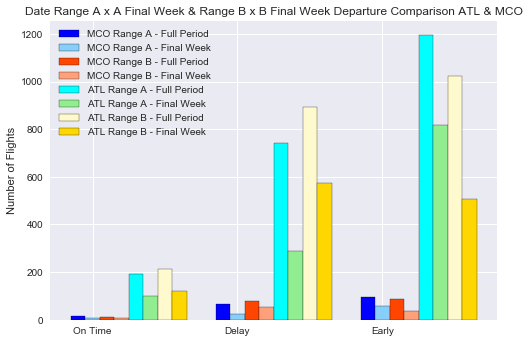

In [181]:
# libraries (values manually inserted)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Total Departures Early: 1291
# Total Departures On Time: 205
# Total Departures Delayed: 811
# Total Departures: 2307



palette = sns.color_palette("pastel")

# width of the bars
barWidth = 0.1

# List order on-time, delayed, early 
 
# Height of the blue bars 
#bars1 = [14, 68, 96] #MCO rangeA 
bars1 = ListMCOA
# Height of the lightskyblue bars
#bars2 = [8, 25, 56] # MCO range A Final
bars2 = ListMCOAF
# Height of the orangered bars
#bars3 = [13, 79, 88] #MCO range B Final
bars3 = ListMCOB
# Height of the lightsalmon bars
#bars4 = [7, 52, 38]
bars4 = ListMCOBF
# Height of the cyan bars
#bars5 = [191, 743, 1195]]
bars5 = ListATLA
# Height of the lightgreen bars
#bars6 = [99, 289, 818]
bars6 = ListATLAF
# Height of the lemonchiffon bars
#bars7 = [214, 895, 1023]]
bars7 = ListATLB
# Height of the gold bars
#bars8 = [120, 574, 509]
bars8 = ListATLBF



# Height of the error bars (bars1)
yer1 = [0, 0.0, 0]
 
# Height of the error bars (bars2)
yer2 = [0, 0.0, 0]

# Height of the error bars (bars3)
yer3 = [0, 0.0, 0]
 
# Height of the error bars (bars4)
yer4 = [0, 0.0, 0]

# Height of the error bars (bars5)
yer5 = [0, 0.0, 0]
 
# Height of the error bars (bars6)
yer6 = [0, 0.0, 0]

# Height of the error bars (bars7)
yer7 = [0, 0.0, 0]
 
# Height of the error bars (bars8)
yer8 = [0, 0.0, 0]
    
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

# Create blue bars MCO 12/22/2017 - 01/25/18 Range A FINAL WEEK 
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=2, label='MCO Range A - Full Period')
 
# Create cyan bars - MCO 12/22/2018 - 01/25/19 Range B FINAL WEEK
plt.bar(r2, bars2, width = barWidth, color = 'lightskyblue', edgecolor = 'black', yerr=yer2, capsize=2, label='MCO Range A - Final Week')

# Create blue bars MCO 12/22/2017 - 01/25/18 Range A FINAL WEEK 
plt.bar(r3, bars3, width = barWidth, color = 'orangered', edgecolor = 'black', yerr=yer1, capsize=2, label='MCO Range B - Full Period')
 
# Create cyan bars - MCO 12/22/2018 - 01/25/19 Range B FINAL WEEK
plt.bar(r4, bars4, width = barWidth, color = 'lightsalmon', edgecolor = 'black', yerr=yer2, capsize=2, label='MCO Range B - Final Week')
 
# Create blue bars - ATL 12/22/2017 - 01/25/18 Range A
plt.bar(r5, bars5, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer1, capsize=2, label='ATL Range A - Full Period')
 
# Create cyan bars - ATL 12/22/2018 - 01/25/19 Range B
plt.bar(r6, bars6, width = barWidth, color = 'lightgreen', edgecolor = 'black', yerr=yer2, capsize=2, label='ATL Range A - Final Week')

# Create blue bars - ATL 12/22/2017 - 01/25/18 Range A
plt.bar(r7, bars7, width = barWidth, color = 'lemonchiffon', edgecolor = 'black', yerr=yer1, capsize=2, label='ATL Range B - Full Period')
 
# Create cyan bars - ATL 12/22/2018 - 01/25/19 Range B
plt.bar(r8, bars8, width = barWidth, color = 'gold', edgecolor = 'black', yerr=yer2, capsize=2, label='ATL Range B - Final Week')
 
    
# general layout
plt.style.use('seaborn')
plt.title("Date Range A x A Final Week & Range B x B Final Week Departure Comparison ATL & MCO")
plt.xticks([r + barWidth for r in range(len(bars1))], ['On Time','Delay','Early'])
plt.ylabel('Number of Flights')
plt.legend()
 
# Show graphic
plt.savefig("Date_Range_AxAFinal_BxBFinal_NumbersofFligts_Comparison_MCO_ATL.png")


plt.show()